# Setup

In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd

import xgboost as xgb

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

# [basic sklearn examples](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)

## models

In [2]:
rng = np.random.RandomState(31337)

In [3]:
print("Zeros and Ones from the Digits dataset: binary classification")
digits = sklearn.datasets.load_digits(2)
y = digits['target']
X = digits['data']
kf = sklearn.model_selection.KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(sklearn.metrics.confusion_matrix(actuals, predictions))

Zeros and Ones from the Digits dataset: binary classification
[[87  0]
 [ 1 92]]
[[91  0]
 [ 3 86]]


In [4]:
print("Iris: multiclass classification")
iris = sklearn.datasets.load_iris()
y = iris['target']
X = iris['data']
kf = sklearn.model_selection.KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(sklearn.metrics.confusion_matrix(actuals, predictions))

Iris: multiclass classification
[[19  0  0]
 [ 0 31  3]
 [ 0  1 21]]
[[31  0  0]
 [ 0 16  0]
 [ 0  3 25]]


In [5]:
print("Boston Housing: regression")
boston = sklearn.datasets.load_boston()
y = boston['target']
X = boston['data']
kf = sklearn.model_selection.KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(sklearn.metrics.mean_squared_error(actuals, predictions))

Boston Housing: regression
9.86281492905
15.9899625729


## grid search

In [6]:
print("Parameter optimization")
y = boston['target']
X = boston['data']
xgb_model = xgb.XGBRegressor()
clf = sklearn.model_selection.GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

0.598487960649
{'n_estimators': 100, 'max_depth': 4}


## pickle model

In [7]:
# The sklearn API models are picklable
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(clf, open("best_boston.pkl", "wb"))
clf2 = pickle.load(open("best_boston.pkl", "rb"))
print(np.allclose(clf.predict(X), clf2.predict(X)))

Pickling sklearn API models
True


## early stopping

In [8]:
# Early-stopping

X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=0)
clf = xgb.XGBClassifier()
clf.fit(X_train,
        y_train,
        early_stopping_rounds=10,
        eval_metric="auc",
        eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.999497
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.999497
[2]	validation_0-auc:0.999497
[3]	validation_0-auc:0.999749
[4]	validation_0-auc:0.999749
[5]	validation_0-auc:0.999749
[6]	validation_0-auc:0.999749
[7]	validation_0-auc:0.999749
[8]	validation_0-auc:0.999749
[9]	validation_0-auc:0.999749
[10]	validation_0-auc:1
[11]	validation_0-auc:1
[12]	validation_0-auc:1
[13]	validation_0-auc:1
[14]	validation_0-auc:1
[15]	validation_0-auc:1
[16]	validation_0-auc:1
[17]	validation_0-auc:1
[18]	validation_0-auc:1
[19]	validation_0-auc:1
[20]	validation_0-auc:1
Stopping. Best iteration:
[10]	validation_0-auc:1



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# [Mini course](http://machinelearningmastery.com/xgboost-python-mini-course/)

## Early stopping

In [21]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
    header=None)
data = np.array(data)
X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.3)
mdl = xgb.XGBClassifier()
eval_set = [(X_test, y_test),]
mdl.fit(X_train,
        y_train,
        early_stopping_rounds=10,
        eval_metric="logloss",
        eval_set=eval_set,
        verbose=True)

y_pred = mdl.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.659122
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.627792
[2]	validation_0-logloss:0.605394
[3]	validation_0-logloss:0.585302
[4]	validation_0-logloss:0.568677
[5]	validation_0-logloss:0.556035
[6]	validation_0-logloss:0.539978
[7]	validation_0-logloss:0.52831
[8]	validation_0-logloss:0.520476
[9]	validation_0-logloss:0.51436
[10]	validation_0-logloss:0.503309
[11]	validation_0-logloss:0.495853
[12]	validation_0-logloss:0.490142
[13]	validation_0-logloss:0.48192
[14]	validation_0-logloss:0.479015
[15]	validation_0-logloss:0.473399
[16]	validation_0-logloss:0.471189
[17]	validation_0-logloss:0.469348
[18]	validation_0-logloss:0.463775
[19]	validation_0-logloss:0.462056
[20]	validation_0-logloss:0.460991
[21]	validation_0-logloss:0.458616
[22]	validation_0-logloss:0.456818
[23]	validation_0-logloss:0.453458
[24]	validation_0-logloss:0.452898
[25]	validation_0-logloss:0.450898
[26]	validation_0-logloss:0.448141


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

Accuracy: 75.76%


## Feature Importance

array([ 0.04081633,  0.21088435,  0.08503401,  0.06462585,  0.0952381 ,
        0.19727892,  0.15986395,  0.1462585 ], dtype=float32)

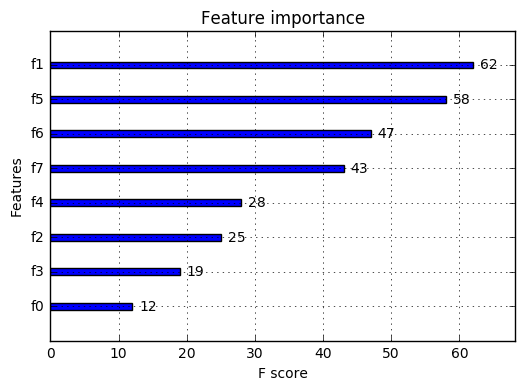

In [23]:
mdl.feature_importances_

xgb.plot_importance(mdl)

## How to Configure Gradient Boosting

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
The depth of trees (tree_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

## Hyperparameter Tuning

In [26]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = sklearn.model_selection.GridSearchCV(mdl, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, y)

The parameters to consider tuning are:

- The number and size of trees (n_estimators and max_depth).
- The learning rate and number of trees (learning_rate and n_estimators).
- The row and column subsampling rates (subsample, colsample_bytree and colsample_bylevel).

In [49]:
result.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# References
- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py
- http://machinelearningmastery.com/xgboost-python-mini-course/
- https://github.com/yang-zhang/xgboost/tree/master/demo
- https://github.com/dmlc/xgboost/tree/master/demo/kaggle-higgs
- [Owen Zhang Slides](https://www.slideshare.net/odsc/owen-zhangopen-sourcetoolsanddscompetitions1/12)